In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("./du lieu cung cap/champagne_new.xlsx", index_col=0)
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
monthly_champange    105 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [8]:
from datetime import datetime

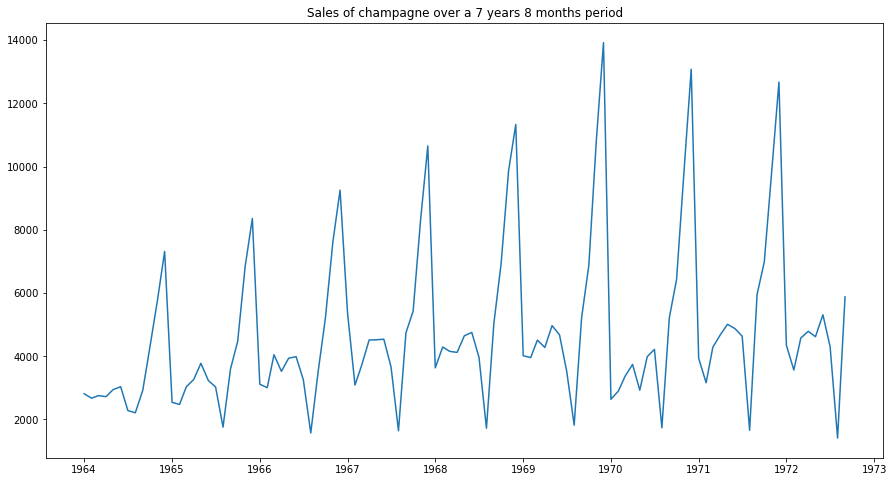

In [10]:
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title("Sales of champagne over a 7 years 8 months period")
plt.show()

In [11]:
type(data)

pandas.core.frame.DataFrame

## Time Series

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
result = seasonal_decompose(x=data, model='multiplicative')

In [14]:
result

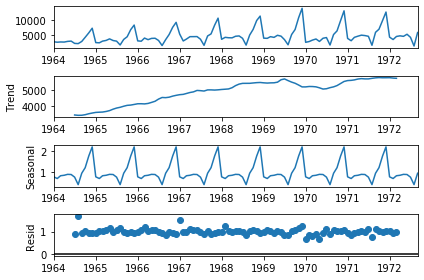

In [15]:
result.plot()
plt.show()

The data is stable and has seasonal pattern.

In [16]:
from pmdarima.arima import auto_arima

In [17]:
stepwise_model = auto_arima(data, start_p = 1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=1485.184, BIC=1497.793, Time=1.696 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1526.661, BIC=1531.705, Time=0.014 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1509.055, BIC=1519.143, Time=0.363 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1490.560, BIC=1500.647, Time=0.519 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1524.662, BIC=1527.183, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,1,0,12) [intercept=True]; AIC=1488.213, BIC=1498.300, Time=0.373 seconds
Near non-invertible roots for order (1, 1, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(1,1,1)x(1,1,1,12) [intercept=True]; AIC=1486.247, BIC=1501.378, Time=1

In [18]:
print(stepwise_model.aic())

1484.3609233785019


7 years 8 months = 92 months --> 75%: 5 years 9 months

In [20]:
train = data.loc['1964-01-01':'1969-10-01']
test = data.loc['1969-10-01':]

In [21]:
test

,monthly_champange
Month,
1969-10-01,6872
1969-11-01,10803
1969-12-01,13916
1970-01-01,2639
1970-02-01,2899
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927
1970-06-01,3986


In [22]:
len(test)

36

In [23]:
len(train)

70

In [24]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [25]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [26]:
future_forecast

array([ 9882.0473762 , 11482.98897035,  4204.02276942,  4242.26582038,
        4684.70145549,  4471.62956099,  5130.45240436,  4889.27443702,
        3780.5263393 ,  1990.21278337,  5371.30361159,  7045.62141239,
       10036.04747893, 11609.4225031 ,  4316.43907729,  4331.64123702,
        4781.67162384,  4556.80943479,  5211.81835675,  4954.59045843,
        3830.46617317,  2044.46708257,  5419.78798004,  7081.81576641,
       10066.42946463, 11635.16343651,  4335.54147004,  4345.43538726,
        4785.64112576,  4553.81209475,  5200.67827197,  4937.11150111,
        3806.54901787,  2011.2088694 ,  5378.67538337,  7033.80999811])

In [27]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

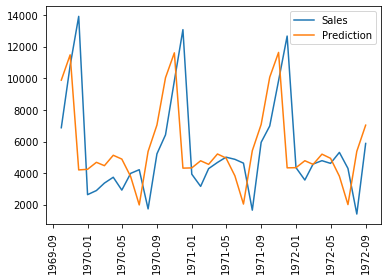

In [28]:
plt.plot(test, label='Sales')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

Prediction matches to the shape of the real data; however, prediction results tend to be smaller at earlier time than reality.

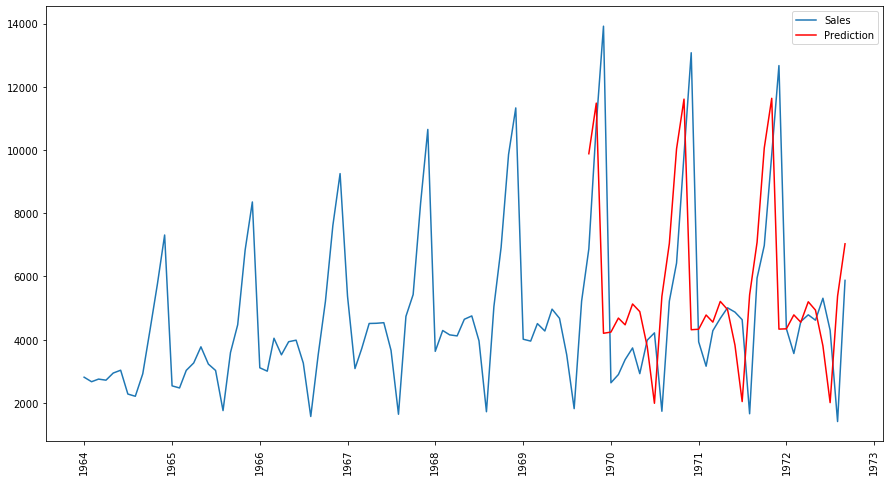

In [29]:
plt.figure(figsize=(15,8))
plt.plot(data, label='Sales')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [32]:
future_forecast = stepwise_model.predict(n_periods=len(test)+9)
future_forecast

array([ 9882.0473762 , 11482.98897035,  4204.02276942,  4242.26582038,
        4684.70145549,  4471.62956099,  5130.45240436,  4889.27443702,
        3780.5263393 ,  1990.21278337,  5371.30361159,  7045.62141239,
       10036.04747893, 11609.4225031 ,  4316.43907729,  4331.64123702,
        4781.67162384,  4556.80943479,  5211.81835675,  4954.59045843,
        3830.46617317,  2044.46708257,  5419.78798004,  7081.81576641,
       10066.42946463, 11635.16343651,  4335.54147004,  4345.43538726,
        4785.64112576,  4553.81209475,  5200.67827197,  4937.11150111,
        3806.54901787,  2011.2088694 ,  5378.67538337,  7033.80999811,
       10010.57556911, 11571.28873457,  4263.94043788,  4265.91190802,
        4698.86102263,  4459.35406065,  5098.7156623 ,  4827.37838318,
        3689.06003456])

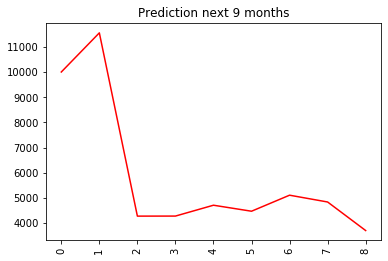

In [34]:
plt.plot(future_forecast[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months")
plt.show()

According to the predicted values above, the sales of champagne would slow down sharply in the next 9 months.